In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
#preprocess
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
#EDA
import matplotlib.pyplot as plt

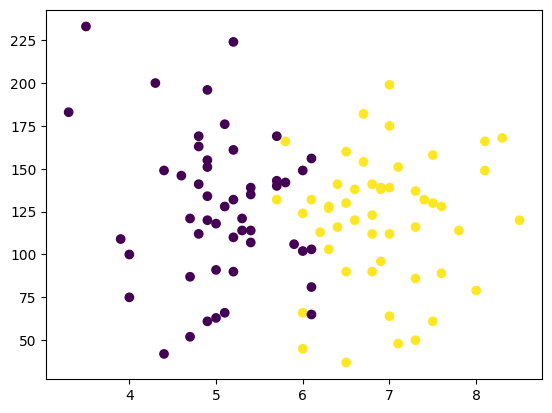

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
#extracting input and output columns
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [13]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
#Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [18]:
X_train

,cgpa,iq
44,7.5,61.0
79,6.5,90.0
33,6.0,149.0
64,7.0,64.0
73,4.9,61.0
...,...,...
22,4.9,120.0
80,4.9,196.0
50,3.5,233.0
93,6.8,112.0


In [19]:
Y_train

44    1
79    1
33    0
64    1
73    0
     ..
22    0
80    0
50    0
93    1
8     0
Name: placement, Length: 90, dtype: int64

In [20]:
X_test

,cgpa,iq
55,7.8,114.0
96,4.4,42.0
57,6.5,130.0
34,4.8,163.0
4,5.8,142.0
16,5.2,224.0
63,6.3,128.0
36,5.7,140.0
47,5.2,161.0
30,7.6,128.0


In [21]:
Y_test

55    1
96    0
57    1
34    0
4     0
16    0
63    1
36    0
47    0
30    1
Name: placement, dtype: int64

In [22]:
#scaling the values
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_train

array([[ 1.31227753e+00, -1.56359989e+00],
       [ 4.38720004e-01, -8.21060639e-01],
       [ 1.94123895e-03,  6.89622658e-01],
       [ 8.75498768e-01, -1.48678548e+00],
       [-9.58972043e-01, -1.56359989e+00],
       [ 1.94123895e-03, -5.13803020e-01],
       [ 2.64008498e-01,  1.26317021e-01],
       [ 2.18583506e+00, -5.29165901e-02],
       [-1.83252957e+00, -3.34569408e-01],
       [-8.71616290e-01, -7.95455838e-01],
       [ 5.26075757e-01, -5.29165901e-02],
       [-6.96904784e-01,  2.54341030e-01],
       [ 9.62854521e-01,  7.40832261e-01],
       [-9.58972043e-01,  7.40832261e-01],
       [ 8.92969919e-02, -1.46118068e+00],
       [-1.72770267e-01,  1.12490429e+00],
       [-7.84260537e-01,  1.51921823e-01],
       [ 8.75498768e-01,  4.33574641e-01],
       [-2.60126020e-01,  1.20171869e+00],
       [ 1.31227753e+00,  2.03131426e-01],
       [-6.96904784e-01, -3.08964607e-01],
       [-7.84260537e-01,  1.38095230e+00],
       [-1.48310656e+00,  1.99546754e+00],
       [-5.

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[ 1.57434479, -0.2065454 ],
       [-1.39575081, -2.05009112],
       [ 0.43872   ,  0.20313143],
       [-1.0463278 ,  1.04808988],
       [-0.17277027,  0.51038905],
       [-0.69690478,  2.60998278],
       [ 0.2640085 ,  0.15192182],
       [-0.26012602,  0.45917944],
       [-0.69690478,  0.99688028],
       [ 1.39963329,  0.15192182]])

In [28]:
#train the model - logistic regression

from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [32]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [35]:
y_pred = clf.predict(X_test)

In [36]:
Y_test

55    1
96    0
57    1
34    0
4     0
16    0
63    1
36    0
47    0
30    1
Name: placement, dtype: int64

In [37]:
#checking accuracy

from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(Y_test,y_pred)

1.0

In [41]:
#plotting
from mlxtend.plotting import plot_decision_regions

<Axes: >

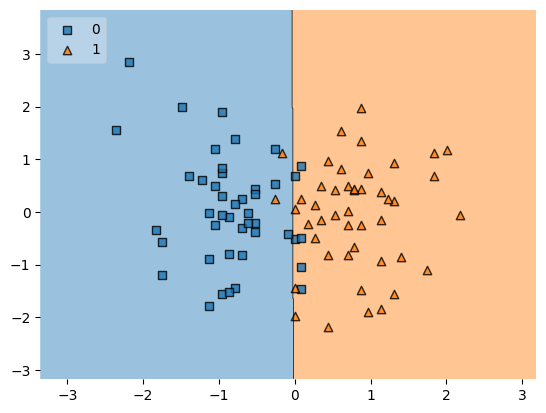

In [42]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [43]:
import pickle

In [45]:
pickle.dump(clf,open('model.pkl','wb'))